# Rapid Intensification Model, Chapter 2: ML-Based RI Model

---

* Creators: Marie C. McGraw<sup>1</sup>, Naufal Razin<sup>1</sup>, and Chris Slocum<sup>2</sup>
* Affiliation:
    - <sup>1</sup>Cooperative Institute for Research in the Atmosphere, Colorado State University, Fort Collins, CO
    - <sup>2</sup>NOAA/NESDIS Center for Satellite Applications and Research, Fort Collins, CO

---

## Overview
Tropical cyclone rapid intensification is a challenge for emergency preparedness given the rarity of the event and challenges in predicting it. To better predict tropical cyclone rapid intensification, forecasters rely on traditional and contemporary machine learning statistical models. These models use data from numerical weather prediction models to characterize the environmental state around the tropical cyclone and satellite observations to characterize the tropical cyclone convective structure. In this notebook, you will use selected pre-processed environmental and satellite data from the Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset ([TC PRIMED](https://rammb-data.cira.colostate.edu/tcprimed/); Razin et al. 2023[a](https://doi.org/10.25921/dmy1-0595),[b](https://journals.ametsoc.org/view/journals/bams/104/11/BAMS-D-21-0052.1.xml), [Slocum et al. 2022](https://journals.ametsoc.org/view/journals/clim/35/21/JCLI-D-22-0127.1.xml)) to predict tropical cyclone intensity change. We will use several different machine learning statistical models to compare and contrast their strengths and weaknesses.

---

## Prerequisites
To successfully navigate and use this notebook, you should be familiar with:
- the basics of Python programming such as loading modules, assigning variables, and list/array indexing;
- using the `pandas` DataFrame format for data processing;
- visualizing data by making plots using the `matplotlib` library.

---

## Learning Outcomes
Upon completion of this notebook, you will know how to:
- Train machine learning models on pre-processed data from TC PRIMED using Python's `scikit-learn` framework;
- Plot and discuss the basic results of machine learning models' ability to predict intensity change.

---

## Time Estimates
- Estimated text reading time: 29 to 57 min
- Estimated code reading time: 12 to 24 min
- Estimated total reading time: 41 to 81 min

## Background

A tropical cyclone forecast typically consists of two parts—<b>track</b> (<i>where</i> the storm is going) and <b>intensity</b> (how <i>strong</i> the storm will be). Forecasters produce track forecasts by specifying the predicted latitude and longitude of the storm center. Whereas for storm intensity, the forecasters specify the predicted maximum 1-minute averaged tangential wind speed. Track forecasts of tropical cyclones have steadily improved over the past 50 years; however, intensity forecasts have not seen the same levels of improvement (e.g., [Cangialosi et al. 2020](https://journals.ametsoc.org/view/journals/wefo/35/5/wafD200059.xml), [DeMaria et al. 2021](https://www.mdpi.com/2073-4433/12/6/683)).

In forecasting intensity, tropical cyclone forecasters are concerned with the rate of intensity change. Many tropical cyclones, including a majority of storms that reach hurricane strength, undergo <b>rapid intensification (RI)</b>. Rapid intensification is the 95<sup>th</sup> percentile increase in the tropical cyclone intensity over a 24 period, which differs slightly across the different tropical cyclone basins. Here, we will use the established threshold of a 30 kt increase or stronger (1 knot = 0.514 m-s<sup>-1</sup>) in intensity over 24 hours (e.g., [Kaplan and DeMaria 2003](https://journals.ametsoc.org/view/journals/wefo/18/6/1520-0434_2003_018_1093_lcorit_2_0_co_2.xml)).  

Forecasts of RI are highly consequential. Such a rapid change in intensity complicates hazards management and mitigation efforts like coordinating the evacuation of coastal communities in the path of a tropical cyclone (Figure 1). However, errors in forecasting RI are substantial contributors to overall errors in intensity forecasting, explaining 20-30% of the intensity forecast errors across basins (e.g., [Trabing and Bell 2020](https://journals.ametsoc.org/view/journals/wefo/35/6/WAF-D-19-0253.1.xml)). In addition, existing intensity forecast models regularly underestimate the maximum intensity for RI cases (e.g., [Torn and DeMaria 2021](https://www.mdpi.com/2073-4433/12/3/373)). Therefore, improving RI forecasts is one of the cornerstones of the Hurricane Forecast Improvement Program, or [HFIP](https://vlab.noaa.gov/web/osti-modeling/hfip). HFIP unifies and coordinates hurricane research efforts to improve forecasts of hurricanes for NOAA and other agencies, like the U.S. Department of Defense's (DOD) Joint Typhoon Warning Center (JTWC). Through HFIP, traditional and contemporary machine-learning-based statistical models were developed to predict tropical cyclone rapid intensification with significant skill. These rapid intensification guidance are crucial tools for forecasters at the NOAA National Hurricane Center (NHC) and Central Pacific Hurricane Center (CPHC), and JTWC.

In this notebook, we will develop machine-learning-based statistical models to predict tropical cyclone rapid intensification. We will use selected pre-processed environmental and satellite data from the Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset ([TC PRIMED](https://rammb-data.cira.colostate.edu/tcprimed/); Razin et al. 2023[a](https://doi.org/10.25921/dmy1-0595),[b](https://journals.ametsoc.org/view/journals/bams/104/11/BAMS-D-21-0052.1.xml),  [Slocum et al. 2022](https://journals.ametsoc.org/view/journals/clim/35/21/JCLI-D-22-0127.1.xml)). The previous notebook in this Learning Journey series illustrates an example of pulling the necessary data from a small subset of TC PRIMED. In this notebook, we will use a larger collection of data that has been pre-pulled and available from [our Zenodo repository](https://doi.org/10.5281/zenodo.16583938).

<figure>
<img alt="A two-panel figure showing GOES-16 10.3-micron longwave infrared observations of Hurricane Idalia (2023). In the first panel, Hurricane Idalia looked ragged on August 29, 2023 at 00 UTC, when it was a 60-knot storm (high-end tropical storm on the Saffir-Simpson Hurricane Wind Scale) at the onset of rapid intensification. In the second panel, Hurricane Idalia looked more organized 24 hours later after rapid intensification, when it was a 90-knot storm (Category 2 on the Saffir-Simpson Hurricane Wind Scale)." src="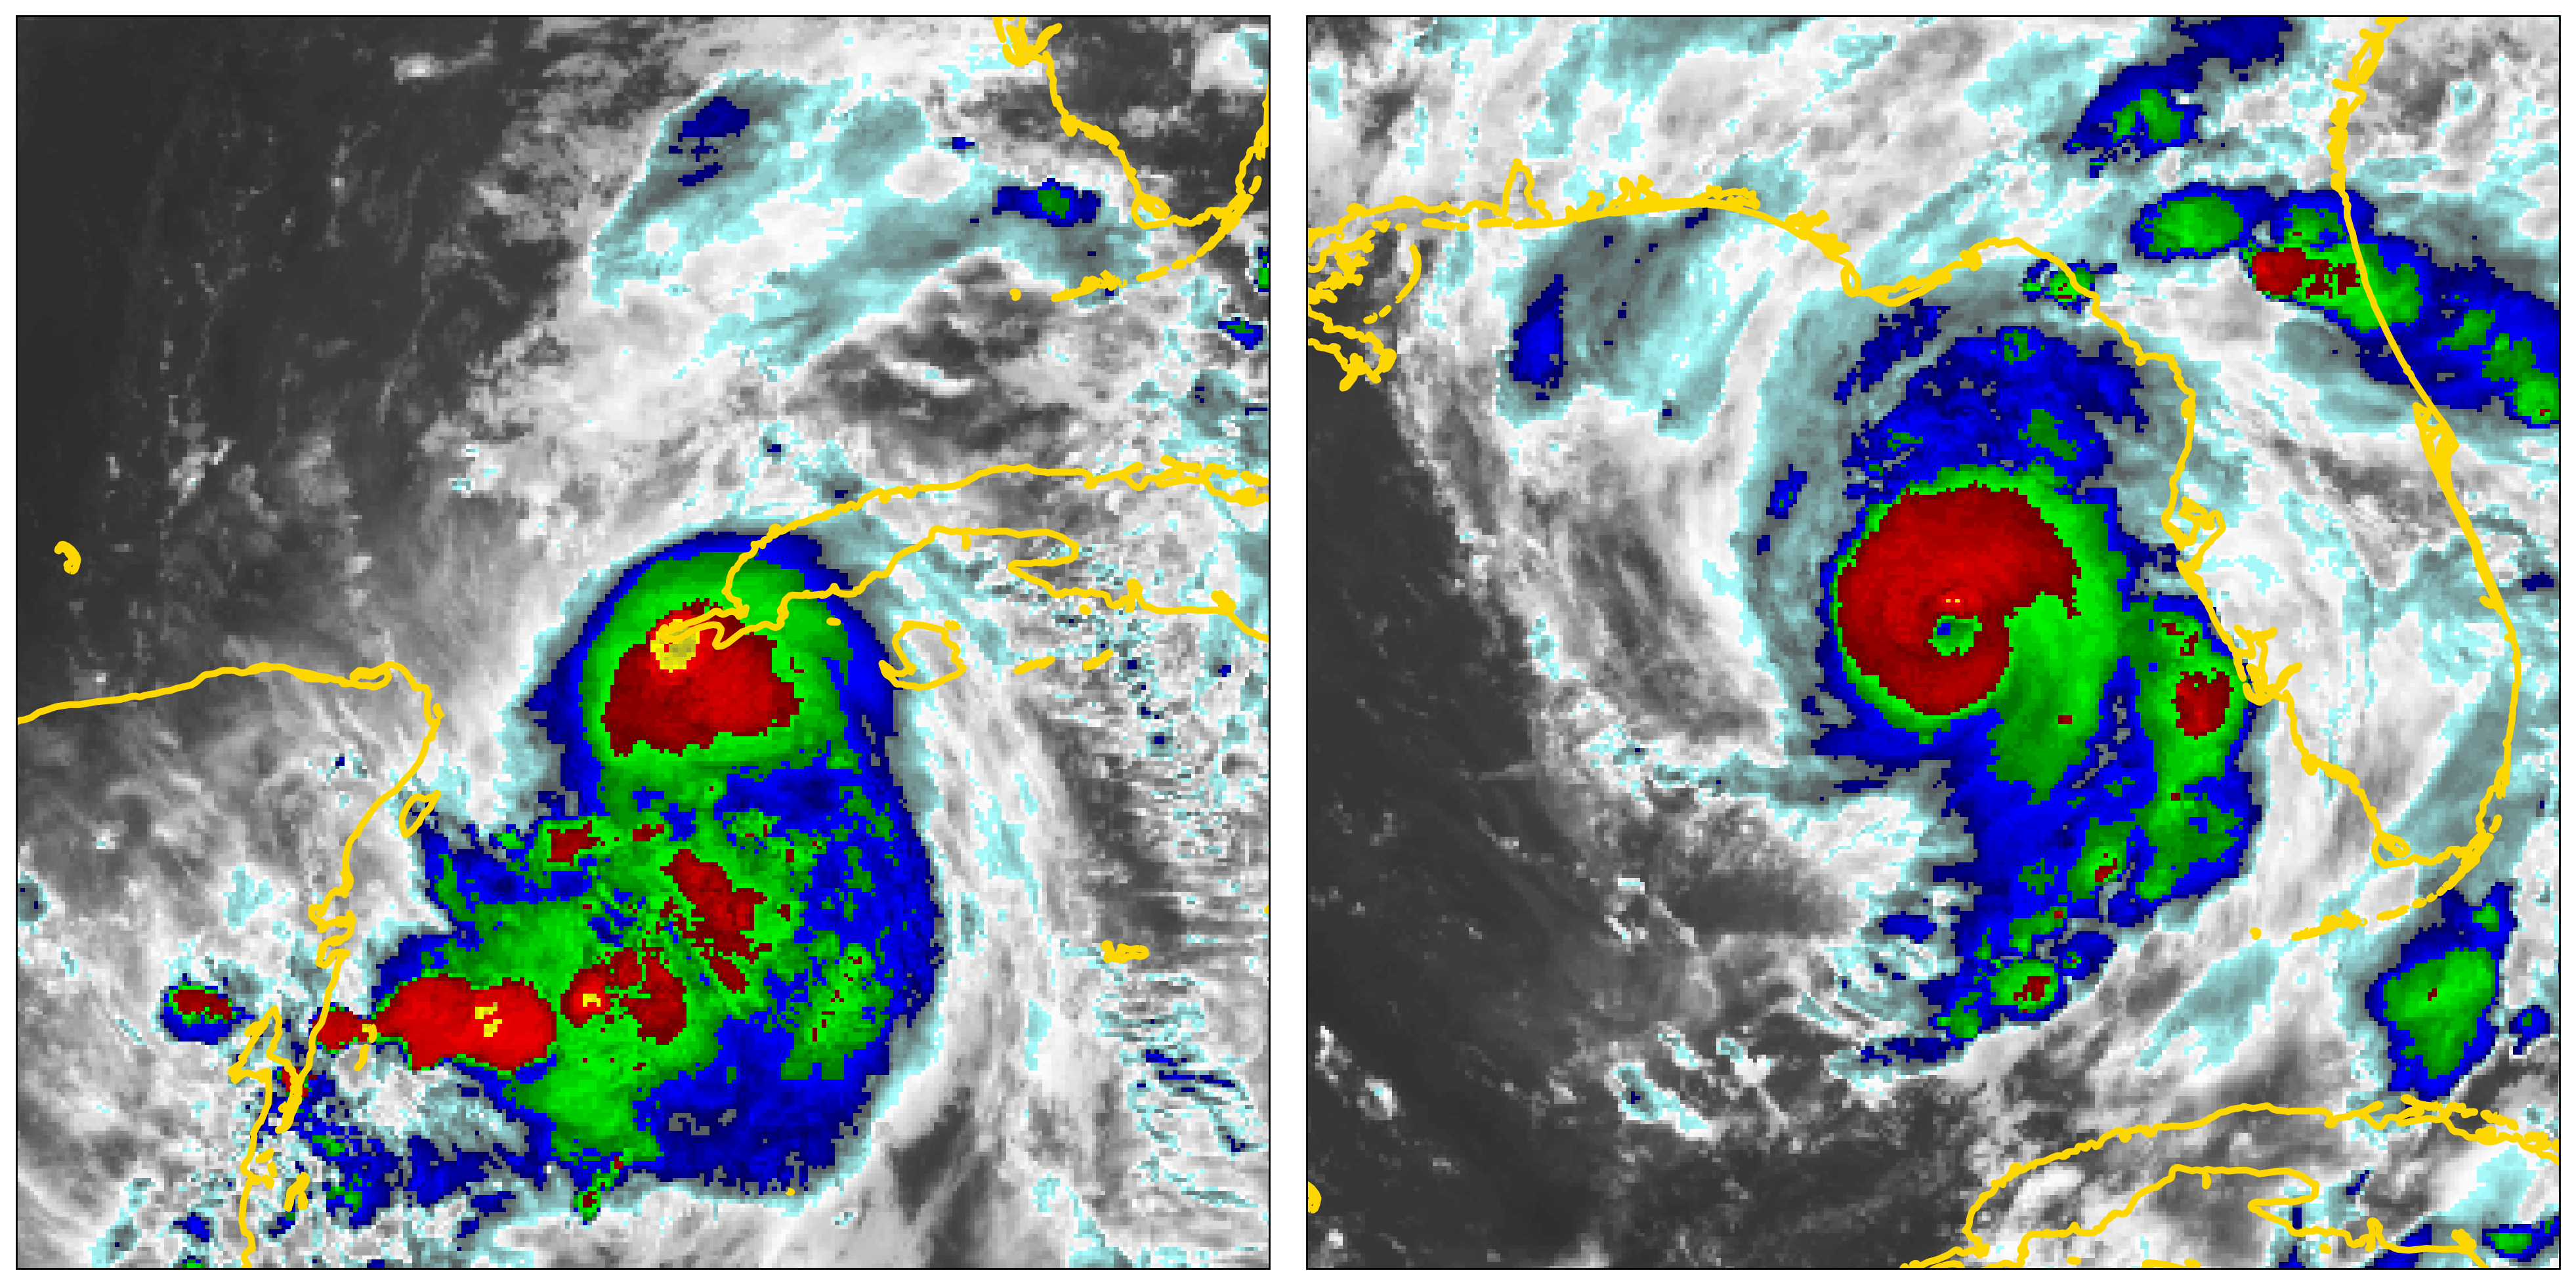" width="1200">

<figcaption align = "center"><b>Figure 1.</b> GOES-16 10.3-&mu;m longwave infrared observations of Hurricane Idalia (2023). Left panel: Hurricane Idalia on August 29, 2023 at 00 UTC, when it was a 60-knot storm (high-end tropical storm on the Saffir-Simpson Hurricane Wind Scale) at the onset of rapid intensification. Right panel, Hurricane Idalia 24 hours later after rapid intensification, when it was a 90-knot storm (Category 2 on the Saffir-Simpson Hurricane Wind Scale), and before it made landfall over Florida as a Category 3 hurricane on the Saffir-Simpson Hurricane Wind Scale.</figcaption>
</figure>

## Software

This tutorial uses the Python programming language and packages. We will use:
* `numpy` for basic computations;
* `pandas` to load our .csv file and manipulate DataFrames;
* `random` for operations that select random numbers;
* `matplotlib` for plotting;
* `requests` and `io` to retrieve pre-pulled data from our Zenodo repository.

For our machine learning analysis, we will be using some modules and functions from the `scikit-learn` package. They include:
* From `sklearn.preprocessing`, we import `StandardScaler` for standardizing features before analysis;
* From `sklearn.model_selection`, we import `GridSearchCV` and `RepeatedStratifiedKFold` to set up our hyperparameter search and cross-validation;
* From `sklearn.pipeline`, we import `Pipeline` to put all the steps of our machine learning analysis together;
* From `sklearn.ensemble`, we import `RandomForestClassifier` to create a random forest model;
* From `sklearn.svm`, we import `SVC` to create a support vector machine model;
* From `sklearn.discriminant_analysis`, we import `LinearDiscriminantAnalysis` to create a linear discriminant analysis model;
* From `sklearn.metrics`, we load several functions that we'll use to analyze our model performance, including `confusion_matrix`,
`classification_report`, and `roc_curve`.
* Finally, from `sklearn.inspection`, we import `permutation_importance` to examine which features are most important.

## Install Packages
Let's first check if we have the necessary Python packages to run this notebook. If we don't, let's install them.

In [1]:
import subprocess, sys
packages = ["numpy", "pandas", "matplotlib", "scikit-learn"]
for package in packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', package])

Now, we'll load the packages we need into this notebook. For some packages, we'll rename them with a shorter name (e.g., `pandas`, `numpy`). Other packages like `scikit-learn` are really large, so we are just going to load the modules and functions that we need.

In [2]:
import numpy as np
import pandas as pd
import random, copy, requests, io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, auc, RocCurveDisplay
from sklearn.inspection import permutation_importance

## Random Seed

Throughout this notebook, we will apply methods that involve a pseudorandom number generator to split the data, train the model, and investigate important features. Without initializing a random seed for the pseudorandom number generator, our results will be different every time we run this notebook. While this "randomness" is one of many factors that ensure that the model we train is sufficiently generalized (more on this later), it complicates the discussions for this notebook. Therefore, we will specify a random seed here to initalize all instances of a pseudorandom number generator in this notebook and ensure that the discussions we provide are representative of the results. Let's supply an arbitrary integer of `1892` for this random seed. If we don't want our results to be the same every time, we can supply a random seed of `None`.

In [3]:
rand_seed = 1892

## Load Data

We begin by reading in the data that we will use to develop our model. As we have mentioned, this data contains pre-pulled variables and is available from [our Zenodo repository](https://doi.org/10.5281/zenodo.16583938). We will then print the first five rows of our data to make sure they look correct.

In [4]:
# Specify URL to file on Zenodo
file_url = "https://zenodo.org/records/16583938/files/tcprimed_diagnostics_1987_2023_AL.csv"

# Download file content into memory
request = requests.get(file_url)
file_content = request.content

# Create an in-memory binary stream
buffer = io.BytesIO(file_content)

# Read the contents of the file
X_load = pd.read_csv(buffer)

# Print the first 5 rows of data
print(X_load.head())

          datetime_str  season    atcfid  storm_lat  storm_v  storm_u  vmax  \
0  1987-08-08T18:00:00    1987  AL021987  30.999895     -5.1      1.3    10   
1  1987-08-09T00:00:00    1987  AL021987  29.999987     -5.1      0.2    10   
2  1987-08-09T06:00:00    1987  AL021987  29.000078     -4.9     -0.9    15   
3  1987-08-11T12:00:00    1987  AL021987  29.401140      6.2      5.6    35   
4  1987-08-11T18:00:00    1987  AL021987  30.700472      5.1      4.7    40   

   per  dvmax24        fcst_time_str  ...  ir_mean_0_200_km  \
0    0        5  1987-08-09T18:00:00  ...              -8.8   
1    0       10  1987-08-10T00:00:00  ...            -999.0   
2    5        5  1987-08-10T06:00:00  ...              -0.1   
3   10       10  1987-08-12T12:00:00  ...            -999.0   
4   15       15  1987-08-12T18:00:00  ...            -999.0   

   ir_mean_100_300_km  ir_std_dev_0_200_km  ir_std_dev_100_300_km  ir_eye_max  \
0                -2.1            15.500000                   15.0

We can see that our `csv` file is loaded and that the data values are within their expected ranges. So far so good! Since the columns in `X_load` contain our potential predictors, we're going to save all of the column names in `X_load` to a list so that we can easily see what predictors are available for us to use.

In [5]:
# Save column names to a list for easy reference
predictor_names = X_load.columns.to_list()

# List out the column names
for predictor_name in predictor_names:
    print(predictor_name)

datetime_str
season
atcfid
storm_lat
storm_v
storm_u
vmax
per
dvmax24
fcst_time_str
sst
pot
tadv_0_to_500_km
shrg_0_to_500_km
shrd_0_to_500_km_850_to_500_hPa
shrd_0_to_500_km_850_to_200_hPa
rh_200_to_800_km_700_850_hPa
rh_200_to_800_km_500_700_hPa
rh_200_to_800_km_300_500_hPa
z_850
d_200
PC60
PC50
PC40
PC30
PC20
PC10
ir_mean_0_200_km
ir_mean_100_300_km
ir_std_dev_0_200_km
ir_std_dev_100_300_km
ir_eye_max
ir_eye_mean
ir_eye_max_radius
ir_profile_min
ir_profile_mean
ir_profile_min_radius


For a more detailed description of each variable, you can refer to the following table.

**Table 1.** A list of variable abbrevations that we use in the notebook, their units, and their descriptions.
<table>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Identifying Information</u></b> </p></td>
    </tr>
    <tr>
        <td>datetime_str</td>
        <td> </td>
        <td>Observation date and time</td>
    </tr>
    <tr>
        <td>season</td>
        <td> </td>
        <td>Tropical cyclone season</td>
    </tr>
    <tr>
        <td>atcfid</td>
        <td> </td>
        <td>Tropical cyclone automated tropical cyclone forecast system identifier</td>
    </tr>
    <tr>
        <td>fcst_time_str</td>
        <td> </td>
        <td>Forecast date and time</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Tropical Cyclone Information</u></b> </p></td>
    </tr>
    <tr>
        <td>storm_lat</td>
        <td>&deg;</td>
        <td>Tropical cyclone latitude</td>
    </tr>
    <tr>
        <td>storm_v</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Meridional component of tropical cyclone speed</td>
    </tr>
    <tr>
        <td>storm_u</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Zonal component of tropical cyclone speed</td>
    </tr>
    <tr>
        <td>vmax</td>
        <td>knots</td>
        <td>Tropical cyclone intensity</td>
    </tr>
    <tr>
        <td>per</td>
        <td>knots</td>
        <td>Tropical cyclone previous 12-hour intensity change</td>
    </tr>
    <tr>
        <td>dvmax24</td>
        <td>knots</td>
        <td>Tropical cyclone future 24-hour intensity change (our target variable)</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Environmental Information</u></b> </p></td>
    </tr>
    <tr>
        <td>sst</td>
        <td>&deg;C</td>
        <td>Sea surface temperature</td>
    </tr>
    <tr>
        <td>pot</td>
        <td>knots</td>
        <td>Tropical cyclone potential intensity</td>
    </tr>
    <tr>
        <td>tadv_0_to_500_km</td>
        <td>K s<sup>&ndash;1</sup></td>
        <td>Temperature advection averaged between 0 and 500 km radius, between 850 and 700 hPa pressure levels</td>
    </tr>
    <tr>
        <td>shrg_0_to_500_km</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Generalized vertical shear magnitude averaged between 0 and 500 km radius</td>
    </tr>
    <tr>
        <td>shrd_0_to_500_km_850_to_500_hPa</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Vertical shear magnitude averaged between 0 and 500 km radius, between 850 and 500 hPa pressure levels</td>
    </tr>
    <tr>
        <td>shrd_0_to_500_km_850_to_200_hPa</td>
        <td>m s<sup>&ndash;1</sup></td>
        <td>Vertical shear magnitude averaged between 0 and 500 km radius, between 850 and 200 hPa pressure levels</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_700_to_850_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 700 and 850 hPa</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_500_to_700_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 500 and 700 hPa</td>
    </tr>
    <tr>
        <td>rh_200_to_800_km_300_to_500_hPa</td>
        <td>%</td>
        <td>Relative humidity averaged between 200 and 800 km and between 300 and 500 hPa</td>
    </tr>
    <tr>
        <td>z_850</td>
        <td>s<sup>&ndash;1</sup></td>
        <td>Vorticity at 850 hPa pressure level</td>
    </tr>
    <tr>
        <td>d_200</td>
        <td>s<sup>&ndash;1</sup></td>
        <td>Divergence at 200 hPa pressure level</td>
    </tr>
    <tr>
        <td colspan="3"> <p style="text-align:center"> <b><u>Satellite Infrared Brightness Temperature Information</u></b> </p></td>
    </tr>
    <tr>
        <td>PC60</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;60&deg;C</td>
    </tr>
    <tr>
        <td>PC50</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;50&deg;C</td>
    </tr>
    <tr>
        <td>PC40</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;40&deg;C</td>
    </tr>
    <tr>
        <td>PC30</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;30&deg;C</td>
    </tr>
    <tr>
        <td>PC20</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;20&deg;C</td>
    </tr>
    <tr>
        <td>PC10</td>
        <td>%</sup></td>
        <td>Percent pixels with brightness temperature less than &ndash;10&deg;C</td>
    </tr>
    <tr>
        <td>ir_mean_0_200_km</td>
        <td>&deg;C</sup></td>
        <td>Mean infrared brightness temperature between 0 and 200 km radius</td>
    </tr>
    <tr>
        <td>ir_mean_100_300_km</td>
        <td>&deg;C</sup></td>
        <td>Mean infrared brightness temperature between 100 and 300 km radius</td>
    </tr>
    <tr>
        <td>ir_std_dev_0_200_km</td>
        <td>&deg;C</sup></td>
        <td>Standard deviation infrared brightness temperature between 0 and 200 km radius</td>
    </tr>
    <tr>
        <td>ir_std_dev_100_300_km</td>
        <td>&deg;C</sup></td>
        <td>Standard deviation infrared brightness temperature between 100 and 300 km radius</td>
    </tr>
    <tr>
        <td>ir_eye_max</td>
        <td>&deg;C</td>
        <td>Maximum infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_eye_mean</td>
        <td>&deg;C</td>
        <td>Mean infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_eye_max_radius</td>
        <td>km</td>
        <td>Radius of maximum infrared brightness temperature in the eye region</td>
    </tr>
    <tr>
        <td>ir_profile_min</td>
        <td>&deg;C</td>
        <td>Minimum infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
    <tr>
        <td>ir_profile_mean</td>
        <td>&deg;C</td>
        <td>Mean infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
    <tr>
        <td>ir_profile_min_radius</td>
        <td>km</td>
        <td>Radius of minimum infrared brightness temperature from radial profile of infrared brightness temperature</td>
    </tr>
</table>

From the list of possible predictors above, some are identifying information (e.g., `season`). We'll deal with the identifying information later. Excluding the identifying information, there are around 30 possible predictors derived from TC PRIMED that we can use in our machine learning model. However, as we noted in the previous notebook of this Learning Journey series, some infrared-based predictors are not available even when the environmental predictors are available. For these cases, the infrared-based predictors contain a `_FillValue` (e.g., &minus;999.0). The `_FillValue` provides some flexibility, since we can:
* train a model with just the environmental predictors, which allows us to use the maximum number of samples that we have.

    OR

* train a model with both the environmental and infrared-based predictors, which, after excluding the samples where the infrared-based predictors are `_FillValue`, produces a smaller number of samples. But, we get to train the model with the infrared-based predictors.

Let's write a piece of code that allows us to do either. That is, if we want to include the infrared-based predictors, we'll set `include_ir` to `True`. And if we want to train the model to use just the environmental predictors, we'll set `include_ir` to `False`. For the rest of this notebook, we'll train a model with the infrared-based predictors.

And, while we're at it, let's add the option to drop any of the predictors. Dropping predictors will give us more flexibility to train our model with a smaller subset of predictors. For now, let's use all of the predictors that we have. That is, our list of predictors to drop is empty.

In [6]:
# Determine whether to include infrared-based
# predictors
include_ir = True

# List of predictors to drop
drop_predictors = []

# Drop the predictors from the DataFrame
X_load = X_load.drop(columns=drop_predictors)

# Drop the predictor from list of predictor names
for drop_predictor in drop_predictors:
    predictor_names.remove(drop_predictor)

# Make a copy of the new list of predictor names
# after we drop the predictors in drop_predictors
predictor_names_copy = copy.deepcopy(predictor_names)

# Specify the first two characters of the
# infrared-based predictor names so that we
# can distinguish them from the environmental
# predictors
ir_var_name_start = ["PC", "ir"]

# Since we're going to actively change the list of
# predictor names, let's loop through the predictor
# names copy
for predictor_name in predictor_names_copy:

    # Get the first two characters of the predictor
    # name
    predictor_name_start = predictor_name[0:2]

    # If the first two characters of the predictor
    # name matches the first two characters of the
    # infrared-based predictors
    if predictor_name_start in ir_var_name_start:

        # If we chose to include infrared-based
        # predictors
        if include_ir:

            # Find all DataFrames where the infrared-based
            # predictor is larger than the _FillValue
            X_load = X_load[X_load[predictor_name] > -999.0]

        # If we chose to exclude infrared-based
        # predictors
        else:

            # Drop the infrared-based predictor from
            # the DataFrame
            X_load = X_load.drop(columns=predictor_name)

            # Drop the infrared-based predictor from list
            # of predictor names
            predictor_names.remove(predictor_name)

## Data Preparation

Let's now prepare the data for model training. Data preparation and preprocessing is a critical part of any machine learning analysis. Due to the complexity of many geospatial datasets, sometimes acquiring, quality controling, and preparing your data is the hardest part of a project! In this task, since we are using TC PRIMED, the steps to acquire and quality control the data have been done for us. So, we can focus on preparing our data for our specific rapid intensification prediction task. In this section, we will go through how to:
* split our data into training, validation, and testing sets
* define our input features and target labels

Let's get started!

### Train-Test Split

Before we train our machine learning model, we must first split our data into <b>training</b>, <b>validation</b>, and <b>testing</b> sets.

* <b>Training</b>: The training set is what we use to train the model. The majority of the data (60-80%) will go into the training set.
* <b>Validation</b>: The validation set is used to evaluate the model performance <i>during</i> model training, to help with such tasks as <b>hyperparameter tuning</b><sup>1</sup>. In some machine learning approaches, we will need to define the validation set manually. In other approaches, this validation set is included in the training set, and the training/validation split is done by automatically.
* <b>Testing</b>: The testing set is used to evaluate the model's performance on unseen data. The testing set must be split from the training and validation data before any model training begins, and cannot be included in the training and validation set in any way.

In splitting our data, we must ensure that our training, validation, and testing sets are <b>independent</b> of each other&mdash;that is, we need to ensure that data from each set doesn't <b>leak</b> into the other sets. If data leakage occurs between the different sets, we run the risk of <b>overfitting</b> the model, and the model will not be <b>sufficiently generalized</b> to make a <i>skillful</i> prediction on a sample it hasn't seen.

For some machine learning problems, splitting the data randomly would be sufficient. However, for our problem, we don't want to do a purely random split, because tropical cyclone data (like many other forms of geophysical data) can be correlated in time. If we're not careful, data from the same storm can occur in each of the training, validation, and testing set. For example, forecasts for Hurricane Laura at 2020-08-23-06Z and 2020-08-23-18Z are not independent of each other, because some of the environmental conditions have likely not changed much in the 12 hours between the forecasts. Therefore, we need to ensure that all data from Hurricane Laura (2020) are in only one of the training, validation, or testing set. So, we need to split our data more thoughtfully to ensure that our training, validation, and testing sets are independent.

For tropical cyclones, we have two main options when it comes to splitting our data:
* <b>By storm</b>: divide data into training, validation, and testing sets using the <i>Automated Tropical Cyclone Forecast system (ATCF) storm identifier (ATCFID)</i>. The ATCFID is a unique 8-character designation for every system that meets the definition of a tropical cyclone as defined by the NHC, CPHC, and JTWC. In splitting our data using the ATCFID, all samples with the same ATCFID go to the same partition;
* <b>By year</b>: divide data into training, validation, and testing sets using the <i>year</i> in which the tropical cyclones occurred. That is, all samples from the same <i>year</i> go to the same partition.

Both strategies are valid, ensure data independence, and are regularly chosen in tropical cyclone research.

In addition, we will use a built-in `sklearn` cross-validation method called the repeated stratified k-folds cross-validation. We discuss this method more below. Using the repeated stratified k-folds cross-validation, the validation and training sets are split automatically. So, we won't manually split the training and validation sets here, and we will proceed with the understanding that our training dataset also includes our validation dataset. However, repeated stratified k-folds cross-validation does not ensure data independence between the training and validation set. We can employ a more complex approach to manually ensure independence between the training and validation set, if we so choose. But, for the purposes of this notebook, we will simply use the stratified k-fold cross-validation with the understanding that the training and validation sets are not independent.

----

<sup>1</sup>: <b>Hyperparameters</b> are the parameters that describe the model architecture and learning process. For a random forest model, these hyperparameters might include the number of decision trees, the maximum depth of each decision tree, and the minimum number of samples per leaf. For an artificial neural network, hyperparameters might include the number of layers and the number of nodes per layer. We'll talk about this more, shortly.

Since we don't want to split our data randomly, we will define our own function to split the data into training (which includes validation) and testing sets. By default, this function will split the data by year; however, a user can choose to split the data by storm instead if they desire. We'll define this function, `train_test_split`, below.

#### `train_test_split(X, test_sample, by_yr=True, rand_seed=None)`

In [7]:
def train_test_split(X, test_sample, by_yr=True, rand_seed=None):
    """
    Create data split.

    This function splits our TC PRIMED DataFrame into training and
    testing sets. We can choose to either split the data by year
    (default setting) or ATCFID.

    Parameters
    ----------
    X : pandas.DataFrame
        dataset containing all of our samples
    test_sample : float OR array
        Contains information about the testing set. This can either be
        a fraction that specifies what fraction of samples go into the
        testing set [float].
        OR a list containing specific samples to assign to the testing
        set (e.g., specific years) [array].
    by_yr : Boolean, default = True
        Boolean indicating whether or not we are splitting the data by
        year. [boolean]
    rand_seed : int, default = None
        Random seed to ensure reproducible results

    Returns
    -------
    X_train : pandas.DataFrame
        Dataset containing all of the samples assigned to the
        training set (which includes the validation set)
    X_test : pandas.DataFrame
        Dataset containing all of the samples
        assigned to the testing set
    yr_test : array
        Array containing the samples in the testing set (either an
        array of ATCFIDs, or of years)
    """
    # Check if we are splitting by year or by storm ID using by_yr
    if by_yr:
        print('splitting data by year')

        # If we're splitting by year, check if we have specified which years to use
        # for testing or not. If we include a list of years to use for testing,
        # then split according to that list.
        if isinstance(test_sample, list):

            # X_test is the data in the specified list of years
            X_test = X[pd.to_datetime(X['datetime_str']).dt.year.isin(test_sample)]

            # X_train is the data not in the specified list of years
            X_train = X[~pd.to_datetime(X['datetime_str']).dt.year.isin(test_sample)]

            yr_test = test_sample

        # Otherwise, if we just provide a fraction for the test data, randomly
        # choose years for training and testing using the random.sample function.
        elif isinstance(test_sample, float):

            # Get a list of all years in our data, and randomly choose N_test fraction of them.
            year_all = pd.to_datetime(X['datetime_str']).dt.year.astype(int).unique().tolist()
            N_test = np.round(test_sample * len(year_all)).astype(int)
            # Initialize random seed for the pseudorandom number generator
            random.seed(rand_seed)
            yr_test = random.sample(year_all, N_test)

            # X_test is the data in the subset of years in yr_test
            X_test = X[pd.to_datetime(X['datetime_str']).dt.year.isin(yr_test)]

            # X_train is the data that is not included in yr_test
            X_train = X[~pd.to_datetime(X['datetime_str']).dt.year.isin(yr_test)]

        else:
            raise TypeError('test_sample must be a list or a float')

    # If we don't want to split by year, split the data by ATCFID instead.
    else:
        print('splitting data by atcfid')

        # If we're splitting data by ATCFID, check if we have specified which
        # ATCFIDs to use for testing or not. If not, randomly select a fraction of
        # storms based on ATCFID.
        if isinstance(test_sample, float):

            # Get a list of all ATCFIDs in our dataset, and randomly select N_test fraction
            # of them.
            atcfid_all = X['atcfid'].unique().tolist()
            N_test = np.round(test_sample * len(atcfid_all)).astype(int)
            # Initialize random seed for the pseudorandom number generator
            random.seed(rand_seed)
            yr_test = random.sample(atcfid_all, N_test)

            # X_test is the data in the subset of ATCFIDs in yr_test
            X_test = X[X['atcfid'].isin(yr_test)]

            # X_train is the data that is not in the subset of ATCFIDs in yr_test
            X_train = X[~X['atcfid'].isin(yr_test)]

        # Otherwise, if we specified a list of ATCFIDs to use in testing data, we
        # split our data according to that list
        elif isinstance(test_sample, list):

            yr_test = test_sample

            # Assign data with ATCFIDs in test_sample to X_test
            X_test = X[X['atcfid'].isin(yr_test)]

            # Assign data with ATCFIDs NOT in test_sample to X_train
            X_train = X[~X['atcfid'].isin(yr_test)]

        else:
            raise TypeError('test_sample must be a list or a float')

    # List of data that are in the test set
    test_list = np.array(yr_test)

    # Return X_train, X_test, and a list of data that are in the test set
    return X_train, X_test, test_list

Now, we'll use our user defined function to split our data into <b>training</b> (which includes <b>validation</b>) and <b>testing</b> sets. We'll put 20% of our data into <b>testing</b> and 80% into <b>training</b>, separating them by year. For now, we'll just randomly select the years. For our sample, which spans 1987&ndash;2023, 20% corresponds to about 7 years' worth of storms. So we'll randomly select 7 years between 1987&ndash;2023, put all samples from those 7 years into the <b>testing</b> set, and the rest will go into <b>training</b>.

Note that, when we provide a float to `test_sample`, we are telling `train_test_split` to split the data randomly by year. Hence, the exact years in `test_list` are going to change every time we re-run this cell, <i>unless we provide a random seed</i>. If we want the same years to go into testing every time, we can provide a random seed or specify the years as list in `test_sample`, e.g.,

```python
test_sample = [2023, 1995, 2003, 2004, 2016, 1990, 2018]
```

As we have discussed, instead of using years to split the data, we can also randomly split the data based on the ATCFIDs.

In [8]:
# Select 20%, or 0.2, as our initial fraction of data to put into testing data
test_sample = 0.2

# Split our data using the fraction of test sample above and
# based on randomly chosen years
X_train_f, X_test_f, test_list = train_test_split(X_load, test_sample, by_yr=True, rand_seed=rand_seed)

# Get a list of all years in our data set.
year_all = pd.to_datetime(X_load['datetime_str']).dt.year.astype(int).unique().tolist()

# Check the years that are contained in test_list. Years that are not included in
# test_list should have been assigned to train_list.
train_list = np.array(year_all)[~np.isin(np.array(year_all), np.array(test_list))]

# Print out the years included in training and testing.
print('training years: ', train_list)
print('testing years: ', test_list)

splitting data by year
training years:  [1987 1988 1989 1990 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2004 2005 2007 2008 2009 2010 2011 2012 2013 2015 2016 2018 2019
 2021 2022]
testing years:  [2006 1991 2014 2017 2003 2020 2023]


Now that we have split our data into training (again, which includes validation) and testing sets, we will define our input features and target labels.

### Input Features and Target Labels

In developing a predictive model, we can think of our dataset as containing two types of variables&mdash;the <b>input variables</b> or <b>features</b>, and the <b>output variable(s)</b> or <b>target label(s)</b>.

* <b>Input Features</b>: These are our predictors. By analyzing relationships between the different input features, the model learns relationships that help it predict the <b>target label</b>.
* <b>Target Label</b>: This is our predictand. In short, this is what we are trying to predict.

In this notebook, our <b>target label</b> is going to be the occurrence of tropical cyclone rapid intensification, and our <b>input features</b> will be the physical quantities in TC PRIMED that we think will help us predict RI.

#### Feature Selection
<b>Feature selection</b> is one of the most important parts of any machine learning study. Identifying which input features will be the most important for predicting your target label requires time and expertise. Ideally, our list of input features is short enough to keep the model simple and interpretable, reduce redundancy among features, and keep model training time reasonable. At the same time, our list of input features still needs to be long enough to capture most of the variability in the target label.

There are many ways to select input features, ranging from domain expertise to prescriptive heuristics. Since our problem, tropical cyclone rapid intensification, has been studied for decades, we already know a lot about what variables are important for rapid intensification. So for this exercise, we have pre-selected key features from a larger dataset based on previous research (e.g., [Kaplan et al. 2010](https://journals.ametsoc.org/view/journals/wefo/25/1/2009waf2222280_1.xml), [Kaplan et al. 2015](https://doi.org/10.1175/WAF-D-15-0032.1), [Knaff et al. 2018](https://journals.ametsoc.org/view/journals/wefo/33/3/waf-d-18-0012_1.xml?rskey=Yrhcg0&result=26), [Rozoff et al. 2015](https://doi.org/10.1175/WAF-D-14-00109.1)). For examples of more complex feature selection methods, see [Slocum (2021)](https://www.star.nesdis.noaa.gov/star/documents/meetings/2020AI/presentations/202101/20210128_Slocum.pptx), [Sampson et al. (2023)](https://journals.ametsoc.org/view/journals/wefo/38/12/WAF-D-23-0084.1.xml).

As we have discussed above when we retrieved `predictor_names`, we have around 30 potential input features for our rapid intensification prediction. These input features include kinematic variables (e.g., wind shear magnitude, vorticity, and divergence), thermodynamic variables (e.g., sea surface temperature, temperature advection, relative humidity, potential intensification), persistence (previous intensity change), and satellite variables that serve as proxy for convective activity (e.g., cold pixel count, mean brightness temperatures, brightness temperature variability, and mean and maximum eye temperatures). Some of the other variables, such as datetime information and ATCFID, are identifying information for our data. We will exclude these identifying information from our input features below.

#### Target Variable
For this notebook, our goal is to predict <b>rapid intensification</b> (recall: a change in tropical cyclone intensity of at least 30 kts in 24 hours). Our target label will depend slightly on how we structure our machine learning problem. In this notebook, we will set up a <b>classification</b> problem. In other words, we will make discrete predictions of our class labels&mdash;is it rapid intensification (<b>RI</b>), or not rapid intensification (<b>not-RI</b>). For this problem, we need to look at our data and determine whether or not the 24-hour intensity change (`dvmax24`) meets the threshold for rapid intensification. If it does, we will label that data with `1` for RI; if not, we will label it with `0` for not-RI.

<i>Note</i>: If we wanted, we could also configure this problem slightly differently, where we create a model that predicts the 24 hour intensity change itself. This model would be set up as a <b>regression</b> problem, where our target label is a continuous variable rather than a set of labels. In this case, the 24-hour wind change itself (`dvmax24`) would be the target label.

Let's create a function to define our <b>target label</b>&mdash;that is, a label that signifies whether or not RI has occurred for a given forecast. We will write a function that looks at the 24 hour change in intensity (`dvmax24`), and assesses whether or not it is greater than or equal to our RI threshold (`ri_thresh`). Recall that we've selected an RI threshold of 30 knots or greater.

#### `get_RI(X, ri_thresh=30)`

In [9]:
def get_RI(X, ri_thresh=30):
    """
    Get RI occurrence.

    This function identifies RI cases in the data based on our desired
    RI threshold applied to the 'dvmax24' variable. If the 24 hour
    change in intensity is greater than or equal to ri_thresh (set to
    30 kts by default), we will assign the 'I_class' variable a value
    of 1, meaning that rapid intensification has occurred. Otherwise,
    'I_class' will be assigned a value of 0, meaning that RI has not
    occurred.

    Parameters
    ----------
    X : pandas.DataFrame
        TC PRIMED dataset
    ri_thresh : int, default = 30
        RI threshold, that is, minimum intensity change in 24 hours,
        in knots.

    Returns
    -------
    X : pandas.DataFrame
        TC PRIMED dataset, modified with an additional column 'IClass'
        indicating whether or not a sample has undergone RI.
    """
    pd.options.mode.chained_assignment = None

    # Assign our target variable, I_class, based on 24-hour change in intensity
    # (dvmax24) and our threshold for RI (ri_thresh). We check to see if 'dvmax24'
    # is greater than or equal to 'ri_thresh'; if it is, we note that RI has
    # occurred by setting the value of 'I_class' to 1.
    X['I_class'] = [1 if x >= ri_thresh else 0 for x in X['dvmax24']]

    return X

Now, let's use our new `get_RI` function to define the target labels for both our training set (`X_train_c`) and our testing set (`X_test_c`).

In [10]:
# Get RI labels for training set
X_train_c = get_RI(X_train_f)

# Get RI labels for testing set
X_test_c = get_RI(X_test_f)

# Let's print out the first few rows of the data
# to make sure that I_class is either 0 or 1
print(X_train_c[['datetime_str', 'atcfid', 'I_class']].head())

           datetime_str    atcfid  I_class
0   1987-08-08T18:00:00  AL021987        0
2   1987-08-09T06:00:00  AL021987        0
48  1987-08-22T18:00:00  AL021987        0
49  1987-08-23T00:00:00  AL021987        0
53  1987-08-24T00:00:00  AL021987        0


As we have discussed earlier, we have some identifying information in our DataFrames (e.g., dates, seasons, and ATCFID). This information is useful for when we want to analyze the model performance on specific tropical cyclone cases after we have finished developing the model. But, we don't want to use this information as predictors in our machine learning model. Thus, we will separate the identifying information from our <b>input features</b>, and instead use them as indices to navigate our data.

We also want to remove our <b>target label</b> (`I_class`) from our <b>input features</b>&mdash;we want to train the model to predict `I_class` without using `I_class` as an input. Since `I_class` is related to `dvmax24`, we will also drop `dvmax24`.

As we remove these data from our DataFrame, let's make sure to also remove them from our list of predictor names.

In [11]:
# Specify which identifying information to separate from our input features
# and use as indices for data navigation
to_ind = ['season', 'atcfid', 'datetime_str', 'fcst_time_str']

# Specify the target labels to remove from our input features
train_drop = ['dvmax24', 'I_class']

# Specify our target labels---the RI/no-RI classification
target_var = ['I_class']

# Retrieve the target labels for both the train and test sets with the
# identifying information set as indices for data navigation using the
# 'set_index' command
y_train = X_train_c[to_ind + target_var].set_index(to_ind)
y_test = X_test_c[to_ind + target_var].set_index(to_ind)

# Remove the target labels that we've specified above from our input
# features for both the train and test sets, with the identifying
# information set as indices for data navigation using the 'set_index'
# command
X_train = X_train_c.drop(columns=train_drop).set_index(to_ind)
X_test = X_test_c.drop(columns=train_drop).set_index(to_ind)

# Remove identifying information from our list of predictor names
for var in to_ind + train_drop:
    if var in predictor_names:
        predictor_names.remove(var)

# Check and make sure that we have input features and target labels for
# both the train and test sets
X_train = X_train.loc[y_train.index.values]
X_test = X_test.loc[y_test.index.values]
y_train = y_train.loc[X_train.index.values]
y_test = y_test.loc[X_test.index.values]

## Machine Learning Model Setup

Now that we've prepared our data, we can build our machine learning models for our task of predicting tropical cyclone rapid intensification. First, we'll introduce the basic machine learning models that we'll use in this exercise. Then, we'll talk more generally about machine learning model architecture by discussing <b>hyperparameters</b> and <b>cross-validation</b>.

### Introduction to Classification Models
There are lots of options when it comes to choosing your machine learning model. In this exercise, we'll use relatively simple versions of three basic classification models. The three models we will explore are:
* <b>Random forest</b>: A random forest classifier fits decision tree classifiers to randomly selected subsamples of the data. It repeats this process over and over again. [more here](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial)
* <b>Support vector machine</b>: A support vector machine classifies data by fitting an optimal line or hyperplane that maximizes the distance between each class. [more here](https://www.ibm.com/topics/support-vector-machine)
* <b>Linear discriminant analysis</b>: A linear discriminant analysis classifies data using a linear decision boundary that's generated by fitting a Gaussian density to each class. [more here](https://www.ibm.com/topics/linear-discriminant-analysis)

These are <i>very</i> brief overviews of these kinds of machine learning models. We encourage the readers to click on the provided links to learn more, or to explore these topics more on their own.

Next, we'll discuss the different adjustments we can make to our models by adjusting or "tuning" model <b>hyperparameters</b>.


### Hyperparameters

<b>Hyperparameters</b> are the parameters that describe the model architecture and learning process. All else being equal, we can obtain a skillful model by finding the best combination of hyperparameters during model training. The `sklearn` package allows us to provide several values for each hyperparameter that we want to test, and it will help us determine which configuration will perform best. 

Different kinds of machine learning classifiers will have different hyperparameters that we can adjust. We discuss some of them below for the three simple models we're using in this notebook.

#### Random Forest Hyperparameters
For a basic <b>random forest</b> classification model, some of the hyperparameters we can adjust include:
* `max_features`: Maximum number of features per decision tree. For classification problems, `max_features` should be approximately $\sqrt{N_{features}}$
* `n_estimators`: Total number of decision trees used in this model. More decision trees is generally better, but comes at a cost of a longer run time.
* `min_samples_leaf`: Minimum number of samples needed to create a new leaf node.
* `max_depth`: Maximum depth of each decision tree. A deeper tree will generally perform better with bigger `max_depth`. But, if a tree is too deep, we can run into overfitting problems and model training takes longer.

A full discussion of the implementation of the random forest classifier (`RF`) in `sklearn` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

#### Support Vector Machine Hyperparameters
For a <b>support vector machine</b>, or `SVC` model, the hyperparameters that we can adjust are a little different. They are:
* `C`: <b>regularization</b><sup>1</sup> parameter; strength is inversely proportional. That is, a small `C` means a larger regularization.
* `kernel`: Specifies kernel type used in the `SVC` classifier. Default is `rbf` (which stands for <b>radial basis function</b>); other kernel options include `linear`, `poly` (<b>polynomial</b> kernel), and `sigmoid` (<b>sigmoid</b> kernel).
* `gamma`: Coefficient for kernel specified in `kernel`.

A full discussion of the implementation of `SVC` in `sklearn` can be found [here](https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html).

#### Linear Discriminant Analysis Hyperparameters
For a <b>linear discriminant analysis</b>, or `LDA` model, we will focus only on two hyperparameters. They are:
* `solver`: The solver used by `LDA` to estimate the decision boundary. Can be `svd` (singular value decomposition), `lsqr` (least squares), or `eigen` (eigenvalue decomposition). For this problem, we'll use `lsqr`.
* `shrinkage`: A form of <b>regularization</b><sup>1</sup>; can be between 0 and 1.

A full discussion of the implementation of `LDA` in `sklearn` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html).

--------
<sup>1</sup> <b>regularization</b>: a technique that adds a penalty to the loss function of a machine learning model to help reduce overfitting and encourage model generalizability.  

### A Note on Class Imbalance

By definition, tropical cyclone rapid intensification is a rare event. For example, our threshold of 30 kt increase in intensity over 24 hours corresponds to approximately the 95th percentile of intensification rate over open ocean in the North Atlantic (e.g., [Kaplan and DeMaria 2003](https://doi.org/10.1175/1520-0434(2003)018<1093:LCORIT>2.0.CO;2)). The small sample size of tropical cyclone rapid intensification makes analyzing them difficult. Rapid intensification occurrences also vary substantially from year to year, as does the total number of tropical cyclones per year&mdash;some years are very active, with over 50% of storms undergoing rapid intensification at some point during their life cycles, while other years will see only 5% of tropical cyclones undergo RI (e.g., [Fudeyasu et al. 2018](https://journals.ametsoc.org/downloadpdf/journals/clim/31/21/jcli-d-17-0653.1.pdf)).

For our machine learning problem, the rarity of tropical cyclone rapid intensification means that we need to address the problem of <b>class imbalance</b>&mdash;that is, we have over 10 times as many `not-RI` cases as `RI` cases, and we need to ensure our training data includes enough `RI` samples for the model to learn something about it. There are several ways of addressing class imbalance in machine learning, including different sampling strategies and class weighting. For this exercise, we will simply use the built-in `sklearn` class weighting protocol, which applies weights to each sample that are inversely proportional to class size.

To learn more about options for sampling strategies, see <b>random oversampling</b> ([Leevy et al. 2018](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-018-0151-6)) or <b>synthetic minority oversampling (SMOTE)</b> ([Chawla et al. 2002](https://www.jair.org/index.php/jair/article/view/10302)). Both of these sampling strategies can easily be integrated into the `sklearn` framework with the `imblearn` package ([Lemaître et al. 2017](https://imbalanced-learn.org/stable/about.html)).

### Cross-Validation

Finally, to reduce the risk of model overfitting and increase the model generalizability, we will use cross-validation. Cross-validation resamples and randomly splits the data to iteratively train and evaluate the model. We will use a strategy called <b>repeated stratified k-folds cross-validation</b>&mdash;recall, this is where we will automatically split our training set into training and validation. In this approach, the model is split into <i>k</i> equally-sized random subsamples. One subsample is retained as validation, while the other $k-1$ samples are used to train the model. We repeat this process $n$ times and average our results to produce a single prediction. The <b>stratified</b> part refers to ensuring that our $k$ subsamples are all class balanced&mdash;that is, they have about the same percentages of each class label to ensure that the rare `RI` cases are proportionately represented in each subsample.

* `k_folds`: number of folds used in the cross-validation approach.
* `n_repeats`: number of times we repeat the $k$-folds process.

### Creating the ML Model Pipeline
Now, we will use Python's `sklearn` library to set up our framework to build our machine learning models. We will use the `Pipeline` functionality to create a generic machine learning pipeline than can be applied to a variety ML model choices. There are several things that we need to note in creating this pipeline.

* We need to reduce the influence from the magnitudes of the input features. For example, let's say that the relative humidity variable has values that range from 0 to 100\%, while the wind shear magnitude variable has values that range from 0 to 20 m s<sup>-1</sup>. In a linear regression, the model may infer more importance to the relative humidity value due to the larger spread in possible values (0 to 100\%) relative to the spread in possible values for the shear magnitude (0 to 20 m s<sup>-1</sup>). However, we know that the wind shear also plays an important role in rapid intensification. To reduce this magnitude bias, we will need to standardize our input features. In our pipeline, we will standardize our input features using the `StandardScaler`.
* Recall that different machine learning models have different hyperparameters that we can tune. We'll use a nested dictionary, called `ML_model_params` to account for this and supply some standard values as a start.
* As we have discussed above, we will use the `RepeatedStratifiedKFolds` cross-validation function to set up our cross-validation scheme.
* To look for the best model hyperparameter configuration, we will use `GridSearchCV`. The best hyperparameter configuration will be decided based on the scoring metric of our choice. As default, we will use the weighted `f1_score`. For a list of different model scores and their descriptions, see [Metrics and Scoring](https://scikit-learn.org/stable/modules/model_evaluation.html).

Let's create a function, `create_model`, to create a pipeline using the setup above.

#### `create_model(model_name, k_folds=10, n_repeats=3, scoring='f1_weighted', rand_seed=None)`

In [12]:
def create_model(model_name, k_folds=10, n_repeats=3, scoring='f1_weighted', rand_seed=None):
    """
    Create an sklearn estimator model.

    This function creates an sklearn Pipeline to perform machine learning
    analysis. We select the estimator and model hyperparameters
    corresponding to model_name. For now, we support three models:
        - random forest (`RF`),
        - linear discriminant analysis (`LDA`), and
        - support vector machines (`SVC`).

    Next, we assemble a `Pipeline` where we specify our scaling. Here,
    we simply standardize our training data using `StandardScaler`, but
    we can use a different scaler if we want to experiment.

    Then, we set up our cross-validation scheme--for this problem, we
    use `RepeatedStratifiedKFold` cross-validation with a specific
    number of folds (`k_folds`) and repeats (`n_repeats`). We specify
    default values for `k_folds` and `n_repeats`.

    Finally, we create our `GridSearchCV` object using our `Pipeline`,
    our specified parameters (will vary based on model choice), and
    cross-validation.

    Parameters
    ----------
    model_name : string
        Name of the ML model you want to use.
        Currently supported options are
        - 'RF',
        - 'SVC', and
        - 'LDA'
    k_folds : int, default = 10
        Number of folds used in cross-validation scheme.
    n_repeats : int, default = 3
        Number of repeats used in cross-validation scheme.
    scoring : str, default = f1_weighted
        Scoring function used to train machine learning model.
    rand_seed : int, default = None
        Random seed to ensure reproducible results
        

    Returns
    -------
    grid_class: GridSearchCV object
        `sklearn` estimator that is ready for `fit` and
        `predict` operations.
    """
    # Nested dictionary containing model hyperparameters for each type of model.
    ML_model_params = {
    # Random forest hyperparameters
        'RF': {
            'use_model': RandomForestClassifier(class_weight='balanced'),
            'model_name': 'rf',
            'max_features': [6],    # sqrt(N_features)
            'n_estimators': [100],
            'max_depth': [6, 8],
            'min_samples_leaf': [10, 20],
            'random_state': [rand_seed]        # random seed for reproducibility
        },
    # Support vector machine hyperparameters
        'SVC': {
            'use_model': SVC(probability=True),
            'model_name': 'svc',
            'C': [0.1, 1],
            'gamma': [0.1, 0.01],
            'kernel': ['rbf'],
            'random_state': [rand_seed]        # random seed for reproducibility
        },
    # Linear discriminant analysis hyperparameters
        'LDA': {
            'use_model': LinearDiscriminantAnalysis(),
            'model_name': 'lda',
            'solver': ['lsqr'],
            'shrinkage': [0, 0.1, 1]
        }
    }

    # Make sure that model_name is one of the models we support.
    if model_name not in ML_model_params.keys():
        raise ValueError('model type not recognized')
    else:
        print('Building ', model_name, ' model')

    # Select correct model according to model_name
    model_choose = ML_model_params[model_name]

    # This is the model name we'll use in the Pipeline object
    model_name_pipe = model_choose['model_name']

    # Now, set up the pipeline using StandardScaler and our desired model
    pipe = Pipeline([('scaler', StandardScaler()), (model_name_pipe, model_choose['use_model'])])

    # Initialize our repeated stratified k-fold cross-validation method
    cv = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=n_repeats, random_state=rand_seed)

    # Remove 'use_model' and 'model_name'
    for i in ['use_model', 'model_name']:
        model_choose.pop(i)

    # Update param keys by appending the model name to the beginning of the key
    for key in list(model_choose.keys()):
        model_choose[model_name_pipe + '__' + key] = model_choose.pop(key)

    # Create gridsearchCV object with the scoring metric
    grid_class = GridSearchCV(pipe, param_grid=model_choose, cv=cv, n_jobs=1, scoring=scoring)

    return grid_class

Now, let's use the function above to create our ML model object for each model type using the default values defined in the function. Then, we'll train the model on our training set. Note that the LDA model does not use a pseudorandom number generator and therefore, does not need a random seed.

Note that model training, `{model}.fit`, can take a few minutes.

In [13]:
RF_model = create_model('RF', rand_seed=rand_seed)
RF_model.fit(X_train, y_train['I_class'])

Building  RF  model


,estimator,Pipeline(step...'balanced'))])
,param_grid,"{'rf__max_depth': [6, 8], 'rf__max_features': [6], 'rf__min_samples_leaf': [10, 20], 'rf__n_estimators': [100], ...}"
,scoring,'f1_weighted'
,n_jobs,1
,refit,True
,cv,RepeatedStrat...om_state=1892)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [14]:
SVC_model = create_model('SVC', rand_seed=rand_seed)
SVC_model.fit(X_train, y_train['I_class'])

Building  SVC  model


,estimator,Pipeline(step...ility=True))])
,param_grid,"{'svc__C': [0.1, 1], 'svc__gamma': [0.1, 0.01], 'svc__kernel': ['rbf'], 'svc__random_state': [1892]}"
,scoring,'f1_weighted'
,n_jobs,1
,refit,True
,cv,RepeatedStrat...om_state=1892)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [15]:
LDA_model = create_model('LDA')
LDA_model.fit(X_train, y_train['I_class'])

Building  LDA  model


,estimator,Pipeline(step...tAnalysis())])
,param_grid,"{'lda__shrinkage': [0, 0.1, ...], 'lda__solver': ['lsqr']}"
,scoring,'f1_weighted'
,n_jobs,1
,refit,True
,cv,RepeatedStrat...om_state=None)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


## Evaluating Our Machine Learning Models

Now that we've trained our models, let's assess how well they predict RI. Here, we assume that `GridSearchCV` in the model the pipeline has provided us with the best model configuration based on the specified model hyperparameters, and that we no longer need to tune or re-train the model. Hence, we will evaluate the model performance using the testing set.

There are many ways to assess model performance&mdash;the best choices will depend on your science goals. Here, we'll stick to a few simple evaluation metrics that are commonly used in numerical weather prediction tasks. For an overview of basic weather verification metrics, check out [this page](https://cawcr.gov.au/projects/verification/).

In this notebook, we will focus our discussion on two model evaluation metrics:
* the confusion matrix, which summarizes our hits, misses, false alarms, and true negatives for our RI predictions
* receiver-operator characteristic (ROC) curves, which compares true positive rates to false positive rates at different probability thresholds

However, we'll also retrieve other evaluation metrics for the user to explore, such as the:
* classification report, which summarizes our main classification metrics of precision score, recall score, and f1 score (see [link](https://cawcr.gov.au/projects/verification/) for their descriptions)
* probability of RI, which gives us a probability of `not-RI` and `RI` for each prediction
* precision-recall curves, which compares precision and recall scores for different probability thresholds

Let's create a function to generate these evaluation metrics.

#### `evaluate_ML_model(model, X_test, y_test)`

In [16]:
def evaluate_ML_model(model, X_test, y_test):
    """
    Generate model evaluation metrics.

    This function evaluates an `sklearn` classifier against the testing
    dataset, and produces some basic evaluation results, such as the
    classification report, the confusion matrix, and the ROC curve.

    Parameters
    ----------
    model : GridSearchCV object
        fitted/trained sklearn model.
    X_test : pandas.DataFrame
        Input features from testing set.
    y_test : pandas.DataFrame
        True target labels for testing set.

    Returns
    -------
    class_report : pandas.DataFrame
        sklearn classification report.
    cm : array
        sklearn confusion matrix.
    ypred_prob : array
        Probabilistic predictions of target variables. Left column 
        (index=0) is probability of not-RI, right column (index=1)
        probability of RI.
    roc_vals : pandas.DataFrame
        Receiver-operator characteristic curve values.
    p_vs_r : pandas.DataFrame
        Precision vs recall curve values.
    """
    # 1. Make predictions on testing set
    y_pred = model.predict(X_test)

    # Get true target labels from testing set
    y_true = y_test['I_class']

    # 2. Make a classification report that contains precision, recall, ,
    # and accuracy scores using the classification_report function.
    # Save results in a DataFrame
    class_report = pd.DataFrame(classification_report(y_true, y_pred, output_dict=True))

    # 3. Make a confusion matrix.
    label_names = ['not-RI', 'RI']    # Provide label names, so we're not stuck with 0 and 1
    labels = model.classes_
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    # 4. Make our probabilistic predictions using predict_proba. We'll use these
    # probabilistic predictions to calculate the ROC curve and the precision-
    # recall curve.
    ypred_prob = model.predict_proba(X_test)
    
    # Retrieve the probability of RI in the model prediction.
    ypred_prob_RI = ypred_prob[:, 1]

    # 5. Calculate the ROC curve, as well as the corresponding area under the
    # curve (auc). Save results in a DataFrame.
    fpr, tpr, auc_thresh = roc_curve(y_true, ypred_prob_RI)
    auc_roc_score = auc(fpr, tpr)    # area under the curve score
    roc_vals = pd.DataFrame(columns=['False Positive Rate', 'True Positive Rate', 'AUC Thresholds', 'AUC Score'])
    roc_vals['False Positive Rate'] = fpr
    roc_vals['True Positive Rate'] = tpr
    roc_vals['AUC Thresholds'] = auc_thresh
    roc_vals['AUC Score'] = auc_roc_score

    # 6. Calculate the precision-recall curve using the probabilistic predictions.
    # Save results in a DataFrame.
    p, r, thresholds = precision_recall_curve(y_true, ypred_prob_RI)
    p_vs_r = pd.DataFrame(columns=['Precision', 'Recall', 'Thresholds'])
    p_vs_r['Precision'] = p[:-1]
    p_vs_r['Recall'] = r[:-1]
    p_vs_r['Thresholds'] = thresholds

    return class_report, cm, ypred_prob, roc_vals, p_vs_r

Now, let's run `evaluate_ML_model` for each model.

In [17]:
# Random forest model
class_report_RF, cm_RF, ypred_prob_RF, roc_vals_RF, p_vs_r_RF = evaluate_ML_model(RF_model, X_test, y_test)

# Linear discriminant analysis model
class_report_LDA, cm_LDA, ypred_prob_LDA, roc_vals_LDA, p_vs_r_LDA = evaluate_ML_model(LDA_model, X_test, y_test)

# Support vector machine model
class_report_SVC, cm_SVC, ypred_prob_SVC, roc_vals_SVC, p_vs_r_SVC = evaluate_ML_model(SVC_model.best_estimator_, X_test, y_test)

#### Confusion Matrix
Let's first look at the confusion matrix for each model. To plot the confusion matrix, we can use the function `ConfusionMatrixDisplay`. This function will produce a figure with numbers and colored-contours representing the number of samples that fall within the different categories.

In [18]:
# Let's set the default font sizes for our plots
plt.rc('font', size=14)
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

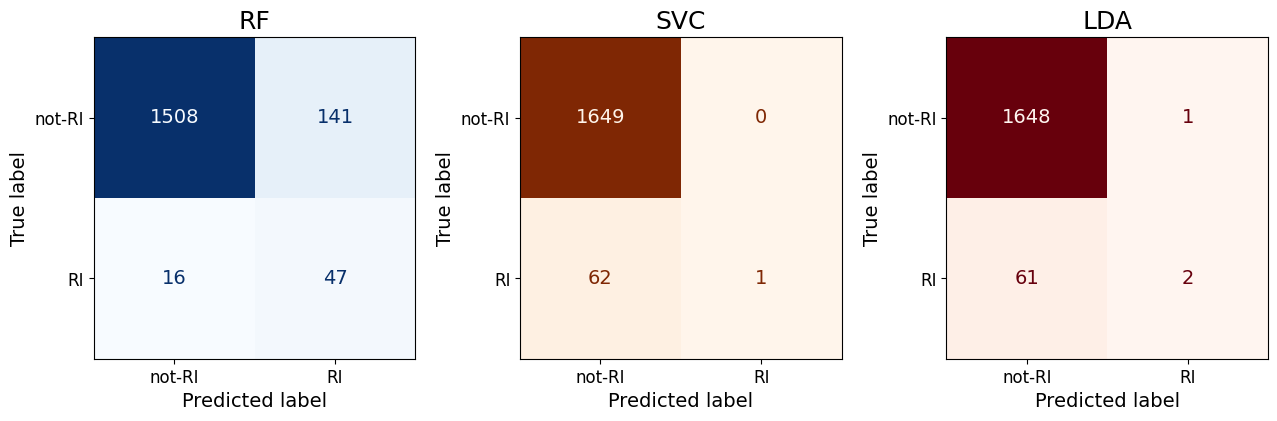

In [19]:
# Let's set up a figure with 3 panels so we can look at
# the confusion matrix for the RF, SVC, and LDA side by side.
fig1, (ax1a, ax1b, ax1c) = plt.subplots(1, 3, figsize=(13, 8))

# RF
cmd_RF = ConfusionMatrixDisplay(cm_RF, display_labels=['not-RI', 'RI'])
cmd_RF.plot(ax=ax1a, cmap='Blues', colorbar=False)
ax1a.set_title('RF', fontsize=18)

# SVC
cmd_SVC = ConfusionMatrixDisplay(cm_SVC, display_labels=['not-RI', 'RI'])
cmd_SVC.plot(ax=ax1b, cmap='Oranges', colorbar=False)
ax1b.set_title('SVC', fontsize=18)

# LDA
cmd_LDA = ConfusionMatrixDisplay(cm_LDA, display_labels=['not-RI', 'RI'])
cmd_LDA.plot(ax=ax1c, cmap='Reds', colorbar=False)
ax1c.set_title('LDA', fontsize=18)

fig1.tight_layout()

Looking at the confusion matrices above, we can see that most of our predictions in all three models are <b>true negatives</b>&mdash;that is, when the model predicts `not-RI` and the true label is in fact `not-RI`. This is not uncommon in a class-imbalanced problem like `RI`. With `RI` being a rare event by definition, most of our samples are going to be `not-RI`.

Focusing on the RF model, we see that for ~45 of our ~1700 predictions in our testing set, the model correctly predicted that `RI` would occur (<b>true positive</b> or <b>hit</b>). For another ~135 samples, the RF model predicted `RI`, but the true label is `not-RI` (<b>false positive</b> or <b>false alarm</b>). For another ~15 samples, the RF model predicted `not-RI`, but the true label is `RI` (<b>miss</b>, or <b>false negative</b>). In meteorology, false alarms aren't great. But many would argue that misses are worse. A false alarm results in people being more cautious than they otherwise would have, while a missed forecast could result in injury, property damage, or even death.

For the SVC and LDA models, we see that both of these models almost NEVER predict `RI`. They have no <b>false alarms</b>, few </b>hits</b>, and more <b>misses</b> than the RF model.

In their current form, none of these models would be useful to tropical cyclone forecasters. However, recall that the models we've developed here are very rudimentary. In our search for the best model hyperparameter configuration above, we supplied only a small subset of possible hyperparameters to reduce the computation time to something more appropriate for this Learning Journey. In practice, algorithm developers will spend a much longer time tuning the model architecture and experimenting with the input features to provide the best physics-based RI prediction.

#### ROC Curve
Let's now plot the receiver-operator characteristic (ROC) curve. Recall that the ROC curve compares true positive rates to false positive rates at different probability thresholds. The explanation is as follows:
* From our predictions, we can obtain the probability of `RI`. These prediction probabilities will have any value between 0 and 1, regardless of whether the model correctly guesses the true label (i.e., the model may have a `RI` probability of 0.95, but the true label is `not-RI`).
* In constructing the ROC curve, we step through different probability thresholds for what constitutes as the `RI` case. For example, let's say we select a probability threshold of 0.1. Therefore, any prediction probabilities at and above 0.1 constitutes the `RI` class.
    * In the case when `RI` actually occurred but the model is unsure and has an `RI` probability of only 0.51, setting a probability threshold of 0.1 captures this true `RI` case. Hence, it increases the true positive rate.
    * But in the case when `RI` did not occur, the model may have an `RI` probability of only 0.25. Mathematically, this probability makes sense and is correct, since the model predicts a much higher probability of `not-RI` (one minus the probability of `RI`; 0.75). But by using the threshold of 0.1, we are saying that this 0.25 probability of `RI` is a true `RI` case. Hence, we increase the false positive rate.
* The ROC curve shows the evolution of the true positive rate and false positive rate as the probability threshold is varied between 0 and 1.
* In the example above, the ROC point will be positioned in the upper-right portion of the figure, where the low probability threshold results in an increase in both the true positive rate and false positive rate.
* Conversely, as we increase the probability threshold, we're essentially selecting the cases when the model is extremely certain of an `RI` prediction, reducing both the true positive rate and false positive rate. Hence, the ROC point will lie in the lower-left portion of the ROC curve.
* Hence, the closer the ROC curve is to the top-left portion of the figure, the better is our model at correctly predicting `RI` without producing too many false positives. We can get a more quantitative representation of the ROC curve by calculating the area under the ROC curve (`AUC` score), where an AUC of 1 is a perfect score.

Let's visualize the ROC curve. We'll use the built-in `sklearn` plotting routine `RocCurveDisplay`.

Text(0.5, 1.0, 'ROC Curves for LDA, SVC, and RF Models')

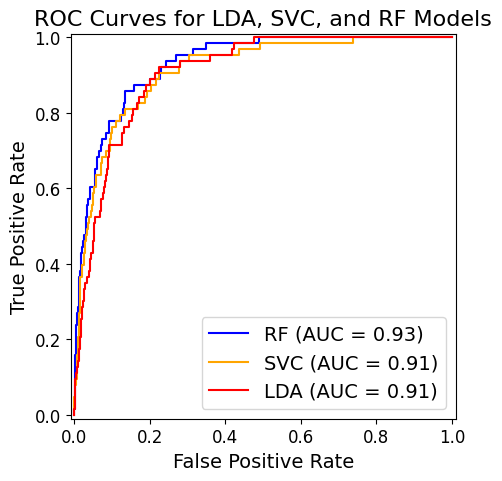

In [20]:
fig2, ax2 = plt.subplots(1, 1, figsize=(12, 5))

# RF
roc_rf = RocCurveDisplay(fpr=roc_vals_RF['False Positive Rate'],
                         tpr=roc_vals_RF['True Positive Rate'],
                         roc_auc=auc(roc_vals_RF['False Positive Rate'],
                                     roc_vals_RF['True Positive Rate']),
                         name='RF')
roc_rf.plot(ax=ax2, curve_kwargs={'color':'blue'})

# SVC
roc_svc = RocCurveDisplay(fpr=roc_vals_SVC['False Positive Rate'],
                          tpr=roc_vals_SVC['True Positive Rate'],
                          roc_auc=auc(roc_vals_SVC['False Positive Rate'],
                                      roc_vals_SVC['True Positive Rate']),
                          name='SVC')
roc_svc.plot(ax=ax2, curve_kwargs={'color':'orange'})

# Plot LDA
roc_lda = RocCurveDisplay(fpr=roc_vals_LDA['False Positive Rate'],
                          tpr=roc_vals_LDA['True Positive Rate'],
                          roc_auc=auc(roc_vals_LDA['False Positive Rate'],
                                      roc_vals_LDA['True Positive Rate']),
                          name='LDA')
roc_lda.plot(ax=ax2, curve_kwargs={'color':'red'})

ax2.set_title('ROC Curves for LDA, SVC, and RF Models')

Looking at the ROC curves, all three models are similar. The RF model is marginally better than the other two models, as it is marginally closer to the top left corner of the figure and has a marginally higher AUC score. Nonetheless, the metric shows that all three models are comparable. How is this possible, when our confusion matrices above show that the RF model performs much better than the SVC and LDA models?

Recall that rapid intensification is a rare occurrence. Therefore, predicting rapid intensification is a heavily imbalanced classification problem. As we increase the probability threshold in creating the ROC curve, we increase the rate of true negative (`not-RI` cases)&mdash;or decrease the rate of false positive&mdash;faster than we decrease the rate of true positive (`RI` cases), because the number of negative class (`not-RI` cases) far outweigh the number of positive class (`RI` cases). Therefore, in a heavily imbalanced classification problem, a model that almost always predicts the majority negative class will exhibit a misleadingly good ROC curve.

The discrepancy between the different metrics highlights the importance of looking at multiple evaluation metrics for your machine learning studies. We've briefly explored this topic here. For more ideas on how to evaluate your machine learning models, see [Wilks (2020)](https://www.sciencedirect.com/book/9780128158234/statistical-methods-in-the-atmospheric-sciences), [Lagerquist et al. (2021)](https://doi.org/10.1175/MWR-D-21-0096.1), [Chase et al. (2022)](https://doi.org/10.1175/WAF-D-22-0070.1), [Haynes et al. (2023)](https://doi.org/10.1175/AIES-D-22-0061.1).

#### Feature Importance

In the previous two figures, we can see that the `RF` model does the best job at predicting `RI`. We might want to know <i>why</i> the `RF` model is the best. Understanding the <i>why</i> behind machine learning models can be complicated, and has even inspired an entire subfield of so-called eXplainable AI (xAI, e.g., [McGovern et al. 2019](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml?tab_body=abstract-display), [Flora et al. 2024](https://journals.ametsoc.org/view/journals/aies/3/1/AIES-D-23-0018.1.xml)).

One popular exploration under the hood of machine learning models is <b>feature importance</b>&mdash;that is, which features are contributing the most to the model's decision making? In this exercise, we'll keep it simple and explore a basic implementation of feature importance in `sklearn`. Specifically, we'll use `sklearn`'s `permutation_importance` function on our random forest model. This function works by randomly shuffling the values of a single feature, and observing how much the model's performance changes. If the model performance drops significantly after shuffling a particular feature, that feature likely has a lot of importance in the model performance, and therefore will have a high importance value. While the `permutation_importance` function can be applied to any of the models that we have developed here, we'll apply it only to the `RF` model, since it is our best performing model.

In running the permutation importance test, `n_repeats` indicates how many times we repeat the permutations. The higher the value of `n_repeats`, the longer the test will take to run. To start, we'll use `n_repeats` of 10. 

In [21]:
# Run the permutation importance test on the random forest model
perm_imp = permutation_importance(RF_model, X_test, y_test, n_repeats=10, random_state=rand_seed)

To know which features are important, we'll print the feature importance values for features where the mean importances is greater than 0. A negative value of feature importance means that that feature is not contributing to the model's predictive ability.

In [22]:
for i in perm_imp.importances_mean.argsort()[::-1]:
    
    # For features with a positive value
    if perm_imp.importances_mean[i] > 0:
        
        # Print feature name
        print(f"{predictor_names[i]:<8} "
              
              # Print mean importance value
              f"{perm_imp.importances_mean[i]:.4f}"
        
              # And standard deviation across all of our repeats
              f" +/- {perm_imp.importances_std[i]:.4f}")

ir_std_dev_0_200_km 0.0041 +/- 0.0013
ir_std_dev_100_300_km 0.0023 +/- 0.0008
vmax     0.0013 +/- 0.0010
tadv_0_to_500_km 0.0005 +/- 0.0013


From the list above, we can see that we have a handful of features with positive importance. However, these values are small and are not necessarily distinct from 0. Nonetheless, we can briefly discuss these important features. Recall that we've supplied our models with many  of the key predictors commonly used in machine-learning-based statistical rapid intensification prediction models developed in previous research. Therefore, we know that these predictors <i>should</i> have an impact on model prediction. Hence, the importance of the `vmax` predictor (the tropical cyclone intensity at observation time) makes sense. However, we cannot deduce the relationship between the tropical cyclone intensity at observation time and `RI` prediction based on this permutation importance analysis alone. One would think that the tropical cyclone intensity at observation time helps in `RI` prediction such that a lower value of intensity would be more conducive for `RI`, since the tropical cyclone has more potential to intensify. However, without digging further, we cannot know for sure&mdash;the permutation importance analysis here just shows that the tropical cyclone intensity at observation time is important in making an accurate `RI` prediction.

Nonetheless, one would then begin to wonder: if we've supplied the model with many of the key predictors, why don't more predictors show up as important input features? First, as we've noted, the models we've developed here are rudimentary. Consequently, the results of the model development and permutation importance are sensitive to various factors, including our choice of random seed. Secondly, recall that we have around 30 input features. Many of these features are correlated. For example, `shrd_0_to_500_km_850_to_500_hPa` (vertical shear of the horizontal winds between the 850 and 500 hPa levels) and `shrd_0_to_500_km_850_to_200_hPa` (vertical shear of the horizontal winds between the 850 and 200 hPa levels). In testing the feature importance, `sklearn`'s `permutation_importance` function shuffles a single feature at a time. In the case in which only one of multiple correlated features is shuffled, the model performance would not drop significantly, as the other correlated, non-shuffled features make up for the missing information in the shuffled feature. Consequently, the importance of the shuffled feature cannot be sufficiently determined.

<div class="alert alert-block alert-success">
    <h2>Exercises</h2>
    <ol>
        <li>As we've seen from the permutation importance analysis, many of the infrared-based predictors show up as important features. Repeat the exercises above by re-training the models with just the environmental predictors (<code>include_ir=False</code>) and look at the list of important features. Do they make sense, in the context of features that are important for accurate <code>RI</code> prediction?</li>
        <li>We've discussed how having strongly correlated input features may mask the importance of any one of the correlated input features. Repeat the exercises above by re-training the models with just the environmental predictors (<code>include_ir=False</code>) and by removing two of the shear diagnostics, <code>shrd_0_to_500_km_850_to_500_hPa</code> and <code>shrd_0_to_500_km_850_to_200_hPa</code>. Then, look at the list of important features. Does it confirm what we understand about having correlated input features in our models?</li>
    </ol>
</div>

## Final Thoughts

In this notebook, we explored various simple versions of out-of-the-box machine learning models to try to predict tropical cyclone <b>rapid intensification</b>. In our exploration, we discussed:
* splitting data into training, validation, and testing sets;
* defining input features and target labels;
* basic characteristics of three classification models: <b>random forest</b>, <b>linear discriminant analysis</b>, and <b>support vector classifiers</b>;
* setting up a small subset of the model hyperparameters;
* dealing with class imbalance;
* using `scikit-learn`'s `Pipeline` and `GridSearchCV` functions to set up a generalizable machine learning model training pipeline;
* basic machine learning model evaluation metrics.

A crucial component in our ability to highlight these different tools is the work we've done in the previous notebook in this Learning Journey series to pre-process and select the input features we want to use in our model from TC PRIMED. However, the examples discussed in this notebook provides a simple overview of the different tools available in developing traditional and contemporary machine learning statistical models to predict tropical cyclone rapid intensification. The models developed in this notebook are rudimentary. In contrast, operational statistical rapid intensification models have undergone meticulous fine-tuning to ensure a skillful physics-based prediction, which includes using only a subset of important predictors that are largely independent from each other, as opposed to using all of the predictors like we have done here ([Kaplan et al. 2010](https://journals.ametsoc.org/view/journals/wefo/25/1/2009waf2222280_1.xml), [Kaplan et al. 2015](https://doi.org/10.1175/WAF-D-15-0032.1), [Knaff et al. 2018](https://journals.ametsoc.org/view/journals/wefo/33/3/waf-d-18-0012_1.xml?rskey=Yrhcg0&result=26), [Rozoff et al. 2015](https://doi.org/10.1175/WAF-D-14-00109.1), [Slocum 2021](https://www.star.nesdis.noaa.gov/star/documents/meetings/2020AI/presentations/202101/20210128_Slocum.pptx), [Sampson et al. 2023](https://journals.ametsoc.org/view/journals/wefo/38/12/WAF-D-23-0084.1.xml)). In addition, we used the predictors calculated from the reanalysis fields for TC PRIMED. Operational statistical rapid intensification models may use either reanalysis fields or outputs from numerical weather prediction models. And, in making operational predictions, the operational rapid intensification statistical models use predictors calculated from numerical weather prediction model outputs.

Now that you're familiar with some basic machine learning concepts and tools, you can explore more advanced machine learning topics. Two starting points that explore machine learning and meteorology are [Chase et al. (2022)](https://doi.org/10.1175/WAF-D-22-0070.1), and [Lagerquist (2020)](https://github.com/thunderhoser/cira_ml_short_course?tab=readme-ov-file).

## Data Statement
The data used in the notebook is publicly available from the following resources:

- Razin, Muhammad Naufal; Slocum, Christopher J.; Knaff, John A.; Brown, Paula J. 2023a. Tropical Cyclone PRecipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED). v01r01. NOAA National Centers for Environmental Information. https://doi.org/10.25921/dmy1-0595.
- Razin, Muhammad Naufal and M. McGraw, 2025: Dataset for Tropical Cyclone Rapid Intensification Learning Journey. Zenodo. [https://doi.org/10.5281/zenodo.16583938](https://doi.org/10.5281/zenodo.16583938).

## References

1. Cangialosi, J.P., E. Blake, M. DeMaria, A. Penny, A. Latto, E. Rappaport, and V. Tallapragada, 2020: Recent progress in tropical cyclone intensity forecasting at the National Hurricane Center. <i>Wea. Forecasting</i>, <b>35</b>, 1913-1922. https://doi.org/10.1175/WAF-D-20-0059.1.

2. Chase, R.J., D.R. Harrison, A. Burke, G. M. Lackmann, and A. McGovern, 2022: A machine learning tutorial for operational meteorology. Part I: Traditional machine learning. <i>Wea. Forecasting</i>, <b>37</b>, 1509-1529. https://doi.org/10.1175/WAF-D-22-0070.1.

3. Chawla, N.V., K.W. Bowyer, L.O. Hall, and W.P. Kegelmeyer, 2002: SMOTE: Synthetic Minority Oversampling Technique. <i>J. Artif. Intell. Res.</i>, <b>16</b>, 321-357. https://doi.org/10.1613/jair.953.

4. DeMaria, M., J.L. Franklin, M.J. Onderlinde, and J. Kaplan, 2021: Operational forecasting of tropical cyclone rapid intensification at the National Hurricane Center. <i>Atmosphere</i>, <b>12</b>, 683. https://doi.org/10.3390/atmos12060683.

5. Flora, M.L., C.K. Potvin, A. McGovern, and S. Handler, 2024: A machine learning explainability tutorial for atmospheric sciences. <i>Artif. Intell. Earth Syst.</i>, <b>3</b>. https://doi.org/10.1175/AIES-D-23-0018.1.

6. Francis, A.S., and B.R. Strahl, 2020, "Annual Tropical Cyclone Report 2020". Joint Typhoon Warning Center. https://www.metoc.navy.mil/jtwc/products/atcr/2020atcr.pdf.

7. Fudeyasu, H., K. Ito, and Y. Miaymoto, 2018: Characteristics of tropical cyclone rapid intensification over the Western North Pacific. <i>J. Climate</i>, <b>31</b>, 8917-8930. https://doi.org/10.1175/JCLI-D-17-0653.1.

8. Haynes, K., R. Lagerquist, M. McGraw, K. Musgrave, and I. Ebert-Uphoff, 2023: Creating and evaluating uncertainty estimates with neural networks for environmental science applications. <i>Artif. Intell. Earth Syst.</i>, <b>2</b>, https://doi.org/10.1175/AIES-D-22-0061.1.

9. Kaplan, J., and M. DeMaria, 2003: Large-scale characteristics of rapidly intensifying tropical cyclones in the North Atlantic basin. <i>Wea. Forecasting</i>, <b>18</b>, 1093-1108. [https://doi.org/10.1175/1520-0434(2003)018<1093:LCORIT>2.0.CO;2](https://doi.org/10.1175/1520-0434(2003)018<1093:LCORIT>2.0.CO;2).

10. Kaplan, J., M. DeMaria, and J.A. Knaff, 2010: A revised tropical cyclone rapid intensification index for the Atlantic and east Pacific basins. <i>Wea. Forecasting</i>, <b>25</b>, 220-241. https://doi.org/10.1175/2009WAF2222280.1.  

11. Kaplan, J., C.M. Rozoff, M. DeMaria, C.R. Sampson, J.P. Kossin, C.S. Velden, J.J. Cione, J.P. Dunion, J.A. Knaff, J.A. Zhang, J.F. Dostalek, J.D. Hawkins, T.F. Lee, and J.E. Solbrig, 2015: Evaluating environmental impacts on tropical cyclone rapid intensification. <i>Wea. Forecasting</i>, <b>30</b>, 1274-1396. https://doi.org/10.1175/WAF-D-15-0032.1.

12. Knaff, J.A., C.R. Sampson, and K.D. Musgrave, 2018: An operational rapid intensification prediction aid for the Western North Pacific. <i>Wea. Forecasting</i>, <b>33</b>, 799-811. https://doi.org/10.1175/WAF-D-18-0012.1.

13. Lagerquist, R., J.Q. Stewart, I. Ebert-Uphoff, and C. Kumler, 2021: Using deep learning to nowcast the spatial coverage of convection from Himawari-8 satellite data. <i>Mon. Wea. Rev.</i>, <b>149</b>, 3897-3921. https://doi.org/10.1175/MWR-D-21-0096.1.

14. Lagerquist, R., "CIRA ML Short Course", 2020. Github repository. https://github.com/thunderhoser/cira_ml_short_course?tab=readme-ov-file.

15. Leevy, J.L, T.M. Khoshgoftaar, R.A. Bauder, and N. Seliya, 2018: A survey on addressing high-class imbalance in big data. <i>J. Big Data</i>, <b>5</b>, https://doi.org/10.1186/s40537-018-0151-6.

16. Lemaître, G., F. Nogueira, and C.K. Aridas, 2017: Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning. <i>J. Machine Learning Res.</i>, <b>18</b>. http://jmlr.org/papers/v18/16-365.html.

17. McGovern, A., R. Lagerquist, D.J. Gagne II, G.E. Jergensen, K.L. Elmore, C.R. Homeyer, and T. Smith, 2019: Making the black box more transparent: Understanding the physical implications of machine learning. <i>Bull. Amer. Meteor. Soc.</i>, <b>100</b>, 2175-2199. https://doi.org/10.1175/BAMS-D-18-0195.1.

18. Razin, M.N., C.J. Slocum, J.A. Knaff, and P.J. Brown, 2023a: Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED), v01r01, NOAA National Centers for Environmental Information. https://doi.org/10.25921/dmy1-0595.

19. Razin, M.N., C.J. Slocum, J.A. Knaff, P.J. Brown, and M.M. Bell, 2023b: Tropical Cyclone Precipitation, Infrared, Microwave, and Environmental Dataset (TC PRIMED). <i>Bull. Amer. Meteor. Soc.</i>, <b>104</b>, E1980-E1998. https://doi.org/10.1175/BAMS-D-21-0052.1.

20. Rozoff, C., C.S. Velden, J. Kaplan, J.P. Kossin, and A.J. Wimmers, 2015: Improvements in the probabilistic prediction of tropical cyclone rapid intensification with passive microwave observations. <i>Wea. Forecasting</i>, <b>30</b>, https://doi.org/10.1175/WAF-D-14-00109.1.

21. Sampson, C.R., J.A. Knaff, C.J. Slocum, M.J. Onderlinde, A. Brammer, M. Frost, and B. Strahl, 2023: Deterministic rapid intensity forecast guidance for the Joint Typhoon Warning Center’s Area of Responsibility. <i>Wea. Forecasting</i>, <b>38</b>, https://doi.org/10.1175/WAF-D-23-0084.1.

22. Slocum, C.J., M.N. Razin, J.A. Knaff, and J.P. Stow, 2022: Does ERA5 mark a new era for resolving the tropical cyclone environment? <i>J. Climate</i>, <b>35</b>, 7147-716. https://doi.org/10.1175/JCLI-D-22-0127.1.

23. Slocum, C.J., 2021: What can we learn from Random Forest in the context of the tropical cyclone rapid intensification problem? 2nd NOAA Workshop on Leveraging AI in the Environmental Sciences, https://www.star.nesdis.noaa.gov/star/documents/meetings/2020AI/presentations/202101/20210128_Slocum.pptx.

24. Torn, R.D. and M. DeMaria, 2021: Validation of ensemble-based probabilistic tropical cyclone intensity change. <i>Atmosphere</i>, <b>12</b>, 373. https://doi.org/10.3390/atmos12030373.

24. Trabing, B.C., and M.M. Bell, 2020: Understanding error distributions of hurricane intensity forecasts during rapid intensity changes. <i>Wea. Forecasting</i>, <b>35</b>, 2219-2234. https://doi.org/10.1175/WAF-D-19-0253.1.

25. Wilks, D. S., 2020: <i>Statistical Methods in the Atmospheric Sciences</i>. 4th ed., Elsevier, 840 pp., [https://doi.org/10.1016/C2017-0-03921-6](https://www.sciencedirect.com/book/9780128158234/statistical-methods-in-the-atmospheric-sciences).


## Metadata
Language / package(s)
* Python
* numpy
* pandas
* matplotlib
* scikit-learn

Domain
* NOAA
* NHC
* CPHC
* JTWC
* ECMWF

Application keywords
* Machine learning
* Forecasting

Geophysical keywords
* Tropical cyclones
* Satellite data
* Environmental data
* Rapid intensification

AI keywords
* Data pre-processing
* Classification
* Class imbalance
* Random forest
* Support vector machine
* Linear discriminant analysis
* Receiver-operator characteristic curve
* Feature importance

## Disclaimer
This Jupyter notebook is a scientific product and is not official communication of the National Oceanic and Atmospheric Administration, or the United States Department of Commerce. All NOAA Jupyter notebooks are provided on an 'as is' basis and the user assumes responsibility for its use. Any claims against the Department of Commerce or Department of Commerce bureaus stemming from the use of this Jupyter notebook will be governed by all applicable Federal law. Any reference to specific commercial products, processes, or services by service mark, trademark, manufacturer, or otherwise does not constitute or imply their endorsement, recommendation or favoring by the Department of Commerce. The Department of Commerce seal and logo, or the seal and logo of a DOC bureau, shall not be used in any manner to imply endorsement of any commercial product or activity by DOC or the United States Government.